# Homework 5
### ASTROINFORMATICS

https://github.com/astromundus/astroinfo2018/homeworks/HW5.ipynb


## Problem

Below in the notebook is the code that generates Figure 10.17 in the textbook. As it is now, it:
* downloads a dataset of variable stars collected with the [LINEAR](https://en.wikipedia.org/wiki/Lincoln_Near-Earth_Asteroid_Research) telescope,
* selects six of them (as given by the `ids` variable),
* computes the Lomb-Scargle periodogram in the `compute_best_frequencies` function,
* finds the best frequency by looking for the highest peak in the periodiogram, and
* folds the light curves and plots the results.

Either by modifying the code below, or by writing similar code, do the following:

1. Find the frequencies for the first 100 stars in the LINEAR datasets (i.e., those with IDs in `data.ids[:100]`, where `data` is the variable containing the LINEAR dataset as defined below).

2. Compute the periods corresponing to the frequencies above, and plot the histogram of periods using 50 bins in range $0 < T < 25$ hours. What do you observe in the histogram?

3. Generate two 6-panel figures analogous to Figure 10.17, for 6 stars (arbitrarily chosen) from the highest and second highest peak, respectivelly. Comment on (dis)similarities of the two plots and of stars within each plot.

4. EXTRA CREDIT: compute the histogram in #2 for ALL (about 7000) stars in the data set, not just the first 100 (note: this will take a while - on a Mac Pro about 5 hours). Modify the histogram range and bin sizes as needed to bring out the features (clusters) in the data. Comment on differences compared to the 100-star case. Extra credit 20% of this homework! 

In [95]:
# Figure 10.17 code

# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
import time

from astroML.decorators import pickle_results
from astroML.time_series import search_frequencies, lomb_scargle, MultiTermFit
from astroML.datasets import fetch_LINEAR_sample

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Compute the best frequencies
@pickle_results('LINEAR_LS.pkl')
def compute_best_frequencies(ids, n_eval=10000, n_retry=5, generalized=True):
    results = {}
    for i in ids:
        t, y, dy = data[i].T
        print(" - computing power for %i (%i points)" % (i, len(t)))
        kwargs = dict(generalized=generalized)
        omega, power = search_frequencies(t, y, dy, n_eval=n_eval,
                                          n_retry=n_retry,
                                          LS_kwargs=kwargs)
        results[i] = [omega, power]

    return results

# plot phased light curves 
def plot_lightcurves(results, ids, true_data=True):
    #------------------------------------------------------------
    # Plot the phased light-curves
    fig = plt.figure(figsize=(5, 6.5))
    fig.subplots_adjust(hspace=0.1, bottom=0.06, top=0.94, left=0.12, right=0.94)

    for i in range(len(ids)):
        # get the data and best-fit angular frequency
        t, y, dy = data[ids[i]].T
        omega, power = results[ids[i]]
        omega_best = omega[np.argmax(power)]
        print(" - omega_0 = %.10g" % omega_best)

        # do a fit to the first 4 Fourier components
        mtf = MultiTermFit(omega_best, 4)
        mtf.fit(t, y, dy)
        phase_fit, y_fit, phased_t = mtf.predict(1000, return_phased_times=True)

        # plot the phased data and best-fit curves
        ax = fig.add_subplot(321 + i)
        if true_data:
            ax.errorbar(phased_t, y, dy, fmt='.k', ecolor='gray', 
                        lw=1, ms=4, capsize=1.5)
        ax.plot(phase_fit, y_fit, '-b', lw=2)

        ax.set_xlim(0, 1)
        ax.set_ylim(plt.ylim()[::-1])
        ax.yaxis.set_major_locator(plt.MaxNLocator(4))

        ax.text(0.03, 0.04, "ID = %i" % ids[i], ha='left', va='bottom',
                transform=ax.transAxes)
        ax.text(0.03, 0.96, "P = %.2f hr" % (2 * np.pi / omega_best * 24.),
                ha='left', va='top',
                transform=ax.transAxes)

        ylim = ax.get_ylim()
        ax.set_ylim(ylim[0], ylim[0] + 1.1 * (ylim[1] - ylim[0]))

        if i < 4:
            ax.xaxis.set_major_formatter(plt.NullFormatter())
        if i % 2 == 0:
            ax.set_ylabel('mag')

        if i in (4, 5):
            ax.set_xlabel('phase')

    return fig 

In [2]:
# Load the dataset
data = fetch_LINEAR_sample(download_if_missing=False)

## Solution

### Q.1 >

In [84]:
hundred=data.ids[:100] 

In [4]:
@pickle_results('Try.pkl')
def compute_best1_frequencies(ids, n_eval=10000, n_retry=5, generalized=True):
    results = {}
    om=np.empty(len(ids))
    j=0
    for i in ids:
        
        t, y, dy = data[i].T
        print("No. %i - computing power for %i (%i points)" % (j,i, len(t)))
        kwargs = dict(generalized=generalized)
        omega, power = search_frequencies(t, y, dy, n_eval=n_eval,
                                          n_retry=n_retry,
                                          LS_kwargs=kwargs)
        results[i] = [omega, power]
        om[j] = omega[np.argmax(power)]
        j+=1
    return results, om

In [86]:
result_dict, om= compute_best1_frequencies(hundred, n_eval=10000, n_retry=5)

@pickle_results: using precomputed results from 'Try.pkl'


In [87]:
om #The first 100 frequencies

array([  50.68860719,    9.34227411,   11.31471267,   10.8907631 ,
         10.20062676,   45.55493503,    7.53593745,   11.52701659,
         17.53065289,   12.65024236,   10.29120901,   22.1463799 ,
         11.03110337,   22.0396775 ,   10.0363784 ,   12.82060684,
         13.70483127,    9.61312167,   10.00077894,    9.44839613,
         21.38496118,    9.72297136,   18.61735151,    9.36061269,
         20.98564547,   51.10600808,   33.36187931,   10.19760776,
         44.9335195 ,   51.5246598 ,   15.99208207,   11.40770932,
         12.26165441,   10.01908601,   45.77922442,   22.90971121,
         19.65703529,   30.14541066,   22.34834586,   12.45254237,
          9.12468625,   22.06637033,   61.22448511,   42.36361618,
         39.26375405,  126.71478285,   47.68349511,   16.77277915,
         63.16006391,   16.24184909,   44.99004599,    7.08807655,
         11.5555222 ,   17.66391129,   12.84221798,   16.24382866,
         10.70117879,   19.33778508,   20.24542723,    5.86593

### Q.2 > PLotting the Histogram for the periods of the first 100 stars

In [6]:
period=2*np.pi/(1*om)*24.

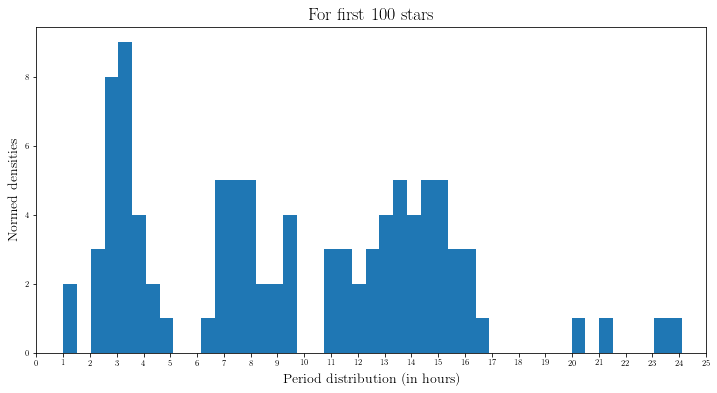

In [89]:
fig=plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.hist(period, bins=50)
ax.set_xlim(0,25)
ax.xaxis.set_ticks(np.arange(0, 26, 1))
ax.set_xlabel("Period distribution (in hours)",fontsize=14)
ax.set_ylabel("Number of stars",fontsize=14)
ax.set_title("For first 100 stars", fontsize=18)
plt.show()

 **Comment**: *The histogram shows clustering pattern. A narrow high peak at roughly P=3 hours shows many stars are variable with a short period. Also a considerable number of stars variable with a period of half a day. A lot of gaps in the period may tell us that a certain frequencies are not preferred by stars. We need a larger sample to comment confidently.*

### Q.3 > Plotting the light curves randomly chosen from the 2 peaks of the above histogram. First peak: 2.5-3.5; Second peak: 14.5-15.5

In [8]:
cond=(period>=2.5)&(period<=3.5)
first=hundred[np.where(cond)]

first_6=np.random.choice(first,6, replace = False)

first_6

array([10363777, 10357287, 10264978, 10178648, 10370011, 10127760])

 - omega_0 = 56.54226528
 - omega_0 = 49.30259111
 - omega_0 = 59.81063796
 - omega_0 = 47.68349511
 - omega_0 = 45.47848749
 - omega_0 = 45.77922442


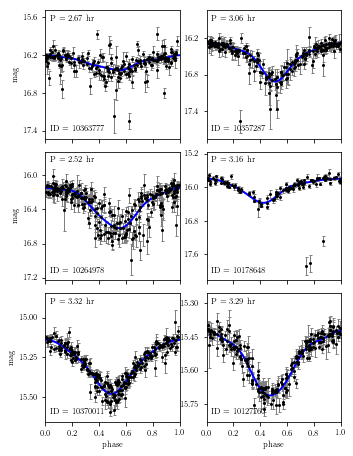

In [96]:
plot1=plot_lightcurves(result_dict, first_6)

In [10]:
cond=(period>=14.5)&(period<=15.5)
second=hundred[np.where(cond)]

second_6=np.random.choice(second,6, replace = False)

second_6

array([10123919, 10307294, 10064356, 10040133,  1034627, 10325207])

 - omega_0 = 10.01908601
 - omega_0 = 9.80868295
 - omega_0 = 10.00077894
 - omega_0 = 10.29120901
 - omega_0 = 10.12829022
 - omega_0 = 10.22610977


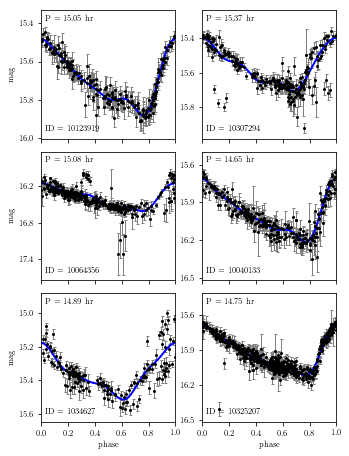

In [97]:
plot2=plot_lightcurves(result_dict, second_6)

### **Comment:** 
1. The stars from the first peak have a uniform light curve in the sense that they increase and decrease in birghtness on the same speed during one variability cycle. This can be concluded from the fact that the minimum of the light curves is at Phase = 0.5 and the symmetricity in their shape.
2. The stars from the second peak having period of about 15 hours show assymetric light curves, as shown by their light curve hitting a minimum at phase = 0.7. Their brightness decreases and reaches a minimum at 70% of their period. It rises up to its max value within the 30% of its period. After hitting the peak, it takes almost twice as much time to hit the minimum again.
3. Roughly every star shows a change in magnitude of 0.6 mag per cycle, irrespective of its period. 


For finding patterns within a set of 6 stars, we plot the Multi Term Fourier fits without the true data.

 - omega_0 = 56.54226528
 - omega_0 = 49.30259111
 - omega_0 = 59.81063796
 - omega_0 = 47.68349511
 - omega_0 = 45.47848749
 - omega_0 = 45.77922442


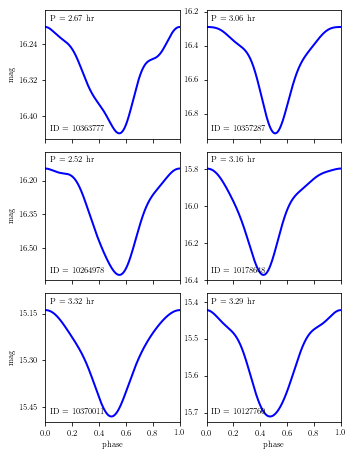

In [98]:
plot1=plot_lightcurves(result_dict, first_6, False)

The 4th and 5th stars (middle right and bottom left) have a similar fit. The last star shows a broad minimum.

 - omega_0 = 10.01908601
 - omega_0 = 9.80868295
 - omega_0 = 10.00077894
 - omega_0 = 10.29120901
 - omega_0 = 10.12829022
 - omega_0 = 10.22610977


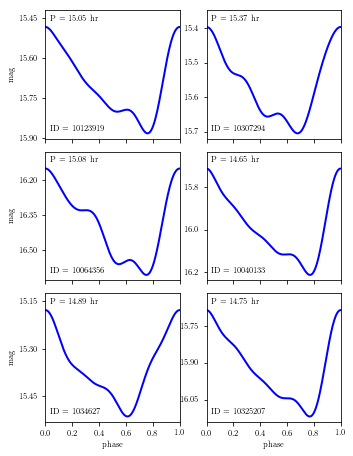

In [99]:
plot2=plot_lightcurves(result_dict, second_6, False)

Stars 1, 4, 6 show almost the same fit to the light curve signifying a similar mode of variablilty. Star 5 has the minimum at Phase=0.6 whereas every other one has its minimum at greater than phase=0.7. It also shows a broad light curve. 

In [12]:
@pickle_results('Exhausted.pkl')
def compute_all_frequencies(ids, n_eval=10000, n_retry=5, generalized=True):
    results = {}
    om=np.empty(len(ids))
    j=0
    for i in ids:
        
        t, y, dy = data[i].T
        print("No. %i - computing power for %i (%i points)" % (j,i, len(t)))
        kwargs = dict(generalized=generalized)
        omega, power = search_frequencies(t, y, dy, n_eval=n_eval,
                                          n_retry=n_retry,
                                          LS_kwargs=kwargs)
        results[i] = [omega, power]
        om[j] = omega[np.argmax(power)]
        j+=1
    return results, om

In [20]:
dids=data.ids

In [21]:
start=time.time()

everything,all_om= compute_all_frequencies(dids)

end=time.time()
print(str(end-start))

@pickle_results: computing results and saving to 'Exhausted.pkl'
No. 0 - computing power for 10003298 (196 points)
No. 1 - computing power for 10004892 (269 points)
No. 2 - computing power for 10013411 (170 points)
No. 3 - computing power for 10021274 (214 points)
No. 4 - computing power for 10022663 (246 points)
No. 5 - computing power for 10025796 (233 points)
No. 6 - computing power for 10028253 (38 points)
No. 7 - computing power for 10030349 (255 points)
No. 8 - computing power for 10032668 (193 points)
No. 9 - computing power for 10038903 (227 points)
No. 10 - computing power for 10040133 (257 points)
No. 11 - computing power for 10040491 (228 points)
No. 12 - computing power for 10045187 (229 points)
No. 13 - computing power for 10045615 (101 points)
No. 14 - computing power for 10046720 (136 points)
No. 15 - computing power for 10047498 (221 points)
No. 16 - computing power for 1004849 (607 points)
No. 17 - computing power for 1005497 (607 points)
No. 18 - computing power for 1

The output for the 7010 stars is hidden in the cell above

In [24]:
len(all_om)
periods=2*np.pi/(1*all_om)*24.

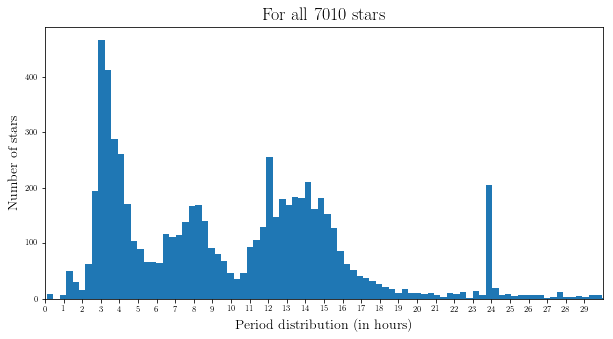

In [102]:
fig1=plt.figure(figsize=(10,5))
ax1 = fig1.add_subplot(111)
ax1.hist(periods, bins=1000)
ax1.set_xlim(0,30)
ax1.xaxis.set_ticks(np.arange(0, 30, 1))
ax1.set_xlabel("Period distribution (in hours)",fontsize=14)
ax1.set_ylabel("Number of stars",fontsize=14)
ax1.set_title("For all 7010 stars", fontsize=18)

plt.show()

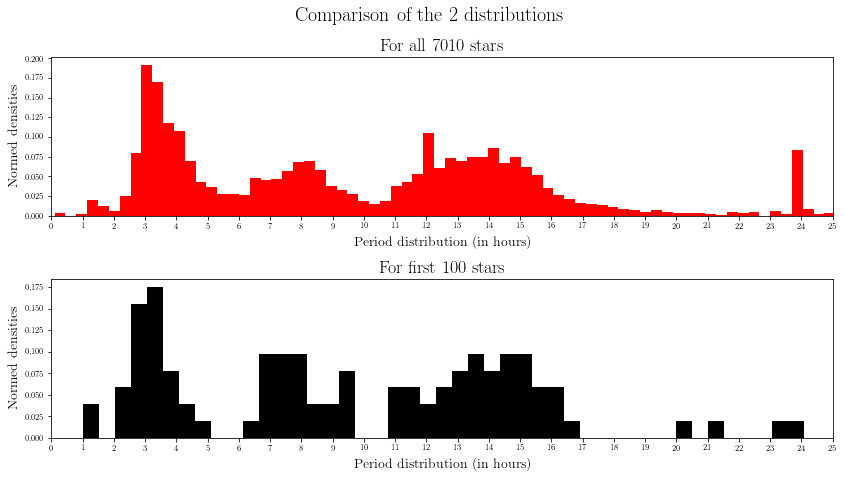

In [103]:
fig2, ax2 = plt.subplots(2,1, figsize=(14,7))
ax2 = ax2.ravel()
fig2.suptitle("Comparison of the 2 distributions", fontsize=20)
fig2.subplots_adjust(hspace=0.4)
ax2[0].hist(periods, bins=1000, density=True, color='r')
ax2[0].set_xlim(0,25)
ax2[0].xaxis.set_ticks(np.arange(0, 26, 1))
ax2[0].set_title("For all 7010 stars", fontsize=18)

ax2[1].hist(period, bins=50, density=True, color='k')
ax2[1].set_xlim(0,25)
ax2[1].xaxis.set_ticks(np.arange(0, 26, 1))
ax2[1].set_title("For first 100 stars", fontsize=18)
for i in [0,1]:
    ax2[i].set_xlabel("Period distribution (in hours)",fontsize=14)
    ax2[i].set_ylabel("Normed densities",fontsize=14)

    
plt.show()

In [82]:
saved_oms=all_om

In [83]:
np.savetxt("saved.txt", saved_oms)

## **Comment:**
The hisotgram with all the stars' period information almost mirrors the histogram previously generated for the first 100 stars. 
We observe 4 groupings.
1. Highest peak in the period range (2.5-4.5 hours)
2. (7-9 hours)
3. Broad group in the range 12-16 hours
4. After very few stars in the range (16-23 hours), a small peak is obtained at P=24 hours.
